<a href="https://colab.research.google.com/github/aulialigar/computer-vision/blob/main/computer-vision/neural_network/TKC_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/My Drive/TKC')
!ls -a

1  2  3  model_resnet.h5


In [3]:
base_dir = '/content/drive/My Drive/TKC'

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

<h3>Definisikan Model</h3>

In [5]:
IMAGE_SIZE = [150, 150]

In [6]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   # 
)

In [7]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [8]:
for layer in resnet.layers:
    layer.trainable = False

In [9]:
folders = glob(base_dir + '/*')
folders

['/content/drive/My Drive/TKC/3',
 '/content/drive/My Drive/TKC/1',
 '/content/drive/My Drive/TKC/2',
 '/content/drive/My Drive/TKC/model_resnet.h5']

In [10]:
tumor_label = ['1', '2', '3']

In [11]:
x = Flatten() (resnet.output)

In [19]:
prediction = Dense(3, activation = 'softmax')(x)

In [20]:
model = Model(inputs = resnet.input, outputs = prediction)

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [22]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.1)
 
validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.1)

In [24]:
# persiapan data training
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        target_size=IMAGE_SIZE,
        shuffle = True,
        subset='training',
        class_mode='categorical')

# persiapan data validasi
validation_generator = validation_datagen.flow_from_directory(
        base_dir, 
        # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        target_size=IMAGE_SIZE,
        subset='validation',
        class_mode='categorical')

Found 2759 images belonging to 3 classes.
Found 305 images belonging to 3 classes.


In [25]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 100
)

Epoch 1/100
87/87 [==============================] - 70s 757ms/step - loss: 1.1208 - accuracy: 0.4893 - val_loss: 0.7984 - val_accuracy: 0.6721
Epoch 2/100
87/87 [==============================] - 63s 725ms/step - loss: 0.8660 - accuracy: 0.6194 - val_loss: 0.7301 - val_accuracy: 0.7508
Epoch 3/100
87/87 [==============================] - 63s 722ms/step - loss: 0.8181 - accuracy: 0.6241 - val_loss: 0.7120 - val_accuracy: 0.7148
Epoch 4/100
87/87 [==============================] - 63s 720ms/step - loss: 0.7459 - accuracy: 0.6622 - val_loss: 0.6064 - val_accuracy: 0.7279
Epoch 5/100
87/87 [==============================] - 63s 720ms/step - loss: 0.7126 - accuracy: 0.6847 - val_loss: 0.7159 - val_accuracy: 0.6787
Epoch 6/100
87/87 [==============================] - 63s 720ms/step - loss: 0.7287 - accuracy: 0.6749 - val_loss: 0.5637 - val_accuracy: 0.7967
Epoch 7/100
87/87 [==============================] - 62s 715ms/step - loss: 0.7614 - accuracy: 0.6687 - val_loss: 0.8533 - val_accuracy:

#Visualisasi

<h3>Evaluasi Model</h3>

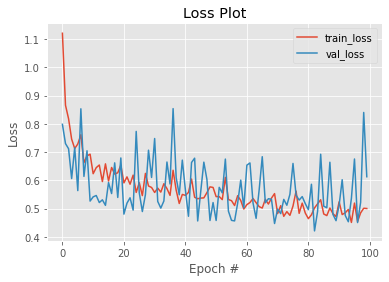

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

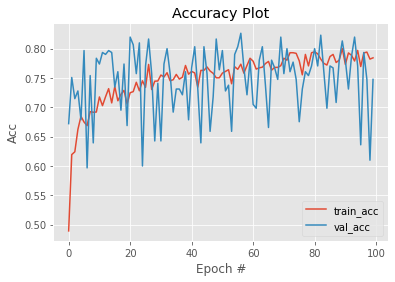

In [27]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
def evaluate(model):

  validation_generator = validation_datagen.flow_from_directory(
          base_dir, 
          target_size=(150,150), 
          batch_size=32, 
          class_mode='categorical',
          shuffle = False,
          subset='validation')

  batch_size = 32
  num_of_test_samples = len(validation_generator.filenames)

  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  print(confusion_matrix(validation_generator.classes, y_pred))


  print('\n\nClassification Report\n')
  target_names = ['1', '2', '3']
  print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [30]:
evaluate(model)

Found 305 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  



Confusion Matrix

[[ 39  30   1]
 [ 11 131   0]
 [ 30  17  46]]


Classification Report

              precision    recall  f1-score   support

           1       0.49      0.56      0.52        70
           2       0.74      0.92      0.82       142
           3       0.98      0.49      0.66        93

    accuracy                           0.71       305
   macro avg       0.73      0.66      0.67       305
weighted avg       0.75      0.71      0.70       305



In [31]:
model.save('model_resnet.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
